## Exploratory Data Analysis-EDA (Análisis exploratorio de los datos)

* Librerias Necesarias

In [15]:
import pandas as pd
import matplotlib.pyplot as pltimport matplotlib.pyplot as plt

* Cargar datos

In [ ]:
# Archivos de review
Kindle_Store = pd.read_parquet('Kindle_Store.parquet')
Home_and_Kitchen = pd.read_parquet('Home_and_Kitchen.parquet')
Appliances = pd.read_parquet('Appliances.parquet')
Industrial_and_Scientific = pd.read_parquet('Industrial_and_Scientific.parquet')
Office_Products = pd.read_parquet('Office_Products.parquet')

# Archivos de meta
meta_Appliances = pd.read_parquet('meta_Appliances.parquet')
meta_Home_and_Kitchen = pd.read_parquet('meta_Home_and_Kitchen.parquet')
meta_Industrial_and_Scientific = pd.read_parquet('meta_Industrial_and_Scientific.parquet')
meta_Kindle_Store = pd.read_parquet('meta_Kindle_Store.parquet')
meta_Office_Products = pd.read_parquet('meta_Office_Products.parquet')

En este análisis se va a revisar la distribución y la evolución de los datos, para ello se analizará la distribución del puntaje y el precio con respecto a las ctegorias y los items.

    - ¿Cúal es la distribución de los puntajes en las categorías Kindle Store, Home and Kitchen, Appliances, Industrial and Scientific y Office Products?

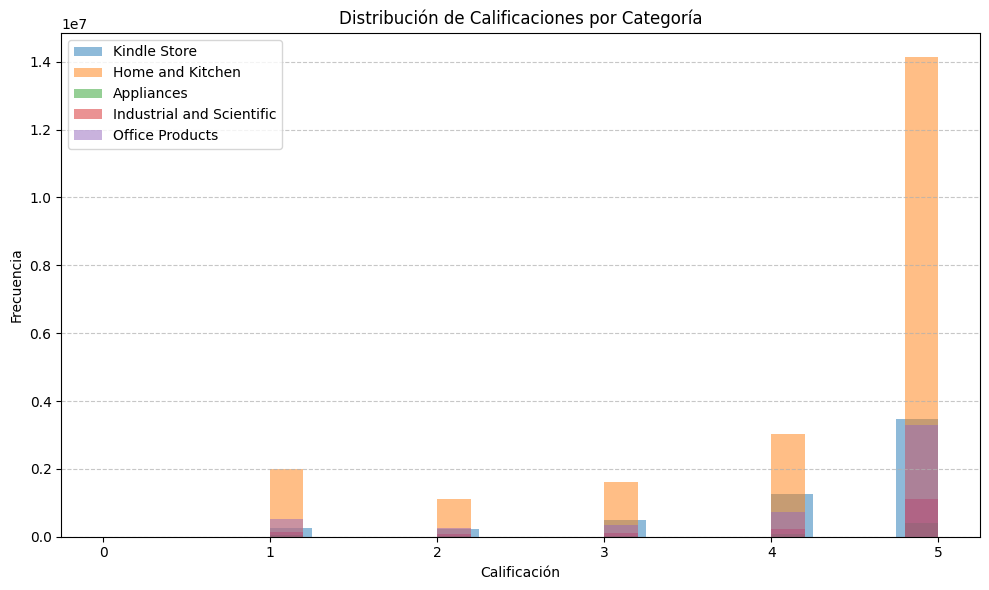

In [30]:
# Extraer el puntaje de cada DataSet
scores_Kindle_Store = list(Kindle_Store['overall'])
scores_Home_and_Kitchen = list(Home_and_Kitchen['overall'])
scores_Appliances = list(Appliances['overall'])
scores_Industrial_and_Scientific = list(Industrial_and_Scientific['overall'])
scores_Office_Products = list(Office_Products['overall'])

# Lista de puntuaciones de cada DataFrame
scores = [scores_Kindle_Store, scores_Home_and_Kitchen, scores_Appliances, 
          scores_Industrial_and_Scientific, scores_Office_Products]

# Nombres de las categorías
categories = ['Kindle Store', 'Home and Kitchen', 'Appliances',
              'Industrial and Scientific', 'Office Products']

# Crear un gráfico de barras
plt.figure(figsize=(10, 6))  # Ajusta el tamaño del gráfico
for i, category_scores in enumerate(scores):
    plt.hist(category_scores, bins=20, alpha=0.5, label=categories[i])

plt.title('Distribución de Calificaciones por Categoría')
plt.xlabel('Puntaje')
plt.ylabel('Frecuencia')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



En el análisis de la distribución de puntajes por categoría, se destaca que la categoría "Home and Kitchen" es la más densamente poblada en términos de información y exhibe un predominio en casi todos los niveles de puntaje en comparación con las demás categorías. Asimismo, es notable que la mayoría de las categorías presentan una alta concentración de elementos con una calificación de cinco sobre cinco.

No obstante, resulta fundamental dirigir la atención hacia aquellos elementos que recibieron calificaciones bajas en todas las categorías. Examinar estos casos permitirá identificar oportunidades de mejora y comprender las áreas en las que los productos pueden no estar cumpliendo con las expectativas de los usuarios.

    - ¿Cúales son las 10 marcas con mayor presencia entre las categorías Kindle Store, Home and Kitchen, Appliances, Industrial and Scientific y Office Products?

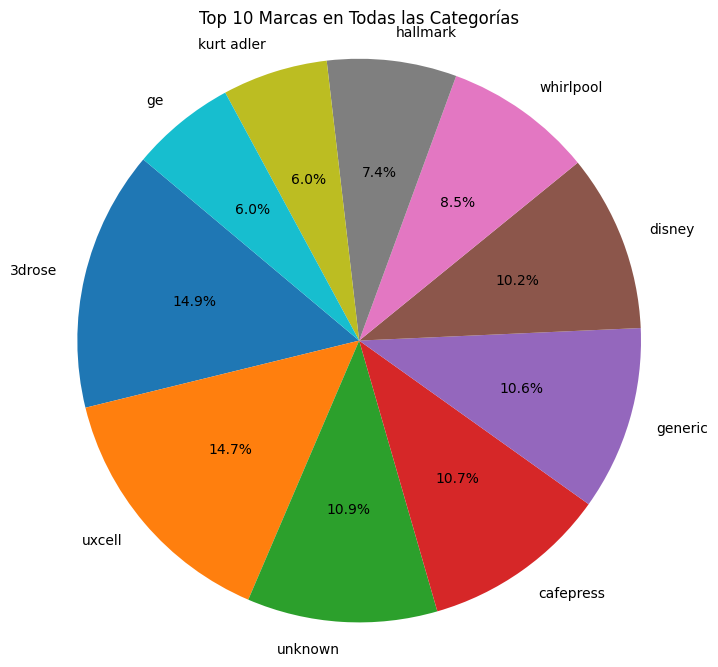

In [44]:
# Extraer las marcas de los DataFrame de meta
brand_counts_appliances = meta_Appliances['brand'].value_counts()
brand_counts_home_kitchen = meta_Home_and_Kitchen['brand'].value_counts()
brand_counts_Industrial_and_Scientific = meta_Industrial_and_Scientific['brand'].value_counts()
brand_counts_Kindle_Store = meta_Kindle_Store['brand'].value_counts()
brand_counts_Office_Products = meta_Office_Products['brand'].value_counts()

# Crear un DataFrame combinado con los recuentos de marcas de todas las categorías
brand_counts_combined = pd.concat([brand_counts_appliances, brand_counts_home_kitchen, 
                                   brand_counts_Industrial_and_Scientific, brand_counts_Kindle_Store, 
                                   brand_counts_Office_Products])

# Sumar los recuentos de marcas por marca (agregar los valores para cada marca)
brand_counts_combined = brand_counts_combined.groupby(brand_counts_combined.index).sum()

# Seleccionar las 10 marcas más populares
top_brands_combined = brand_counts_combined.nlargest(10)

# Crear el gráfico de pastel para las marcas más populares en todas las categorías
plt.figure(figsize=(8, 8))
plt.pie(top_brands_combined, labels=top_brands_combined.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Top 10 Marcas en Todas las Categorías')

# Mostrar el gráfico
plt.show()


    - ¿Cómo es la distribución del precio en cada categoría? (Identificación de Outliers)

En relación a las marcas identificadas con una mayor presencia a través de múltiples categorías, podría ser beneficioso considerar estrategias para fortalecer aún más su posición en el mercado. Estas marcas, al tener una amplia gama de productos en Amazon, poseen una base sólida de consumidores. Además, si un usuario ha recomendado una marca en particular, es probable que tenga una preferencia continua por esa misma marca en sus futuras compras. Por lo tanto, enfocar esfuerzos en el desarrollo y promoción de estas marcas podría generar un impacto positivo en términos de lealtad del cliente y ventas adicionales.






C:\Users\Leidy Hernandez\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Leidy Hernandez\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Leidy Hernandez\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is

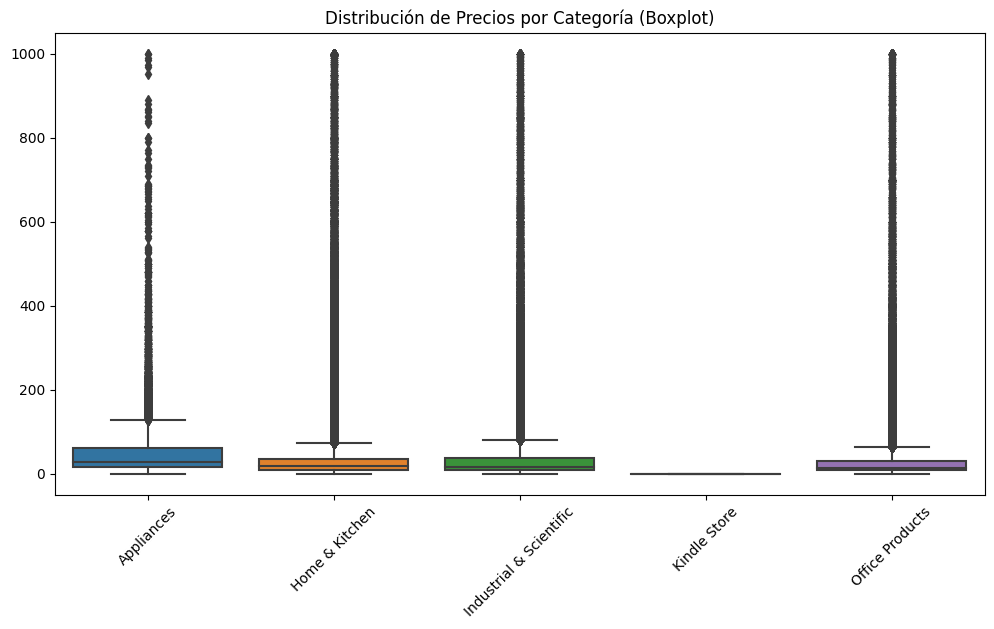

In [50]:
# Extraer los precios de los DataFrame de meta
price_appliances = list(meta_Appliances['price'])
price_home_kitchen = list(meta_Home_and_Kitchen['price'])
price_Industrial_and_Scientific = list(meta_Industrial_and_Scientific['price'])
price_Kindle_Store = list(meta_Kindle_Store['price'])
price_Office_Products = list(meta_Office_Products['price'])

# Crear un DataFrame con los precios de todas las categorías
data = {
    'Category': ['Appliances'] * len(price_appliances) + ['Home & Kitchen'] * len(price_home_kitchen) +
                ['Industrial & Scientific'] * len(price_Industrial_and_Scientific) + 
                ['Kindle Store'] * len(price_Kindle_Store) + ['Office Products'] * len(price_Office_Products),
    'Price': price_appliances + price_home_kitchen + price_Industrial_and_Scientific + price_Kindle_Store + price_Office_Products
}

# Crear un gráfico de caja y bigotes
plt.figure(figsize=(12, 6))
sns.boxplot(x='Category', y='Price', data=data)
plt.title('Distribución de Precios por Categoría (Boxplot)')
plt.xticks(rotation=45)
plt.show()


El gráfico anterior ilustra la distribución de precios en cada categoría. Considerando esta información, se abre la posibilidad de explorar recomendaciones de productos basadas en su precio y categoría en el futuro. Sin embargo, es fundamental realizar un análisis adicional para comprender la relación entre la probabilidad de compra y el precio de los artículos antes de implementar dichas recomendaciones.




